In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
from scipy import fftpack

In [2]:
dfp = pd.read_csv('data/city_hour.csv')
dfp.Datetime = pd.to_datetime(dfp.Datetime,format = '%d-%m-%Y %H:%M')
dfp.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [3]:
dft = pd.read_csv('data/temp_hour.csv')
#del dft['Unnamed: 0']
dft.Datetime = pd.to_datetime(dft.Datetime, format = '%d-%m-%Y %H:%M')
dft.head(5)

,City,Datetime,maxtempC,mintempC,sunHour,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Bengaluru,2009-01-01 00:00:00,27,12,11.6,16,18,18,18,11,2,91,0.0,1014,14,10,109,8
1,Bengaluru,2009-01-01 01:00:00,27,12,11.6,16,17,17,17,9,2,93,0.0,1014,14,7,85,6
2,Bengaluru,2009-01-01 02:00:00,27,12,11.6,15,16,16,16,7,2,94,0.0,1014,13,5,61,4
3,Bengaluru,2009-01-01 03:00:00,27,12,11.6,15,15,15,15,5,2,96,0.0,1014,12,2,37,3
4,Bengaluru,2009-01-01 04:00:00,27,12,11.6,15,18,18,18,5,1,88,0.0,1015,14,5,45,3


In [4]:
df = dfp.merge(dft,on=['City','Datetime'])
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Bengaluru,2015-01-01 01:00:00,NaN,NaN,2.04,12.40,7.58,19.10,0.19,4.05,...,20,14,65,91,0.0,1010,19,7,141,9
1,Bengaluru,2015-01-01 02:00:00,NaN,NaN,2.20,12.11,7.54,17.81,0.21,4.23,...,19,12,74,94,0.0,1010,19,5,149,8
2,Bengaluru,2015-01-01 03:00:00,NaN,NaN,1.66,10.82,6.52,17.42,0.30,4.28,...,19,10,83,97,0.0,1010,18,2,156,6
3,Bengaluru,2015-01-01 04:00:00,NaN,NaN,1.92,10.32,6.46,16.86,0.13,4.14,...,19,9,75,93,0.0,1011,19,5,156,7
4,Bengaluru,2015-01-01 05:00:00,NaN,NaN,1.94,9.82,6.22,16.35,0.15,4.26,...,20,9,66,90,0.0,1011,20,7,155,7


In [5]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'maxtempC', 'mintempC', 'sunHour', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph'],
      dtype='object')

In [6]:
city = ['Bengaluru', 'Delhi', 'Hyderabad', 'Jaipur', 'Mumbai']

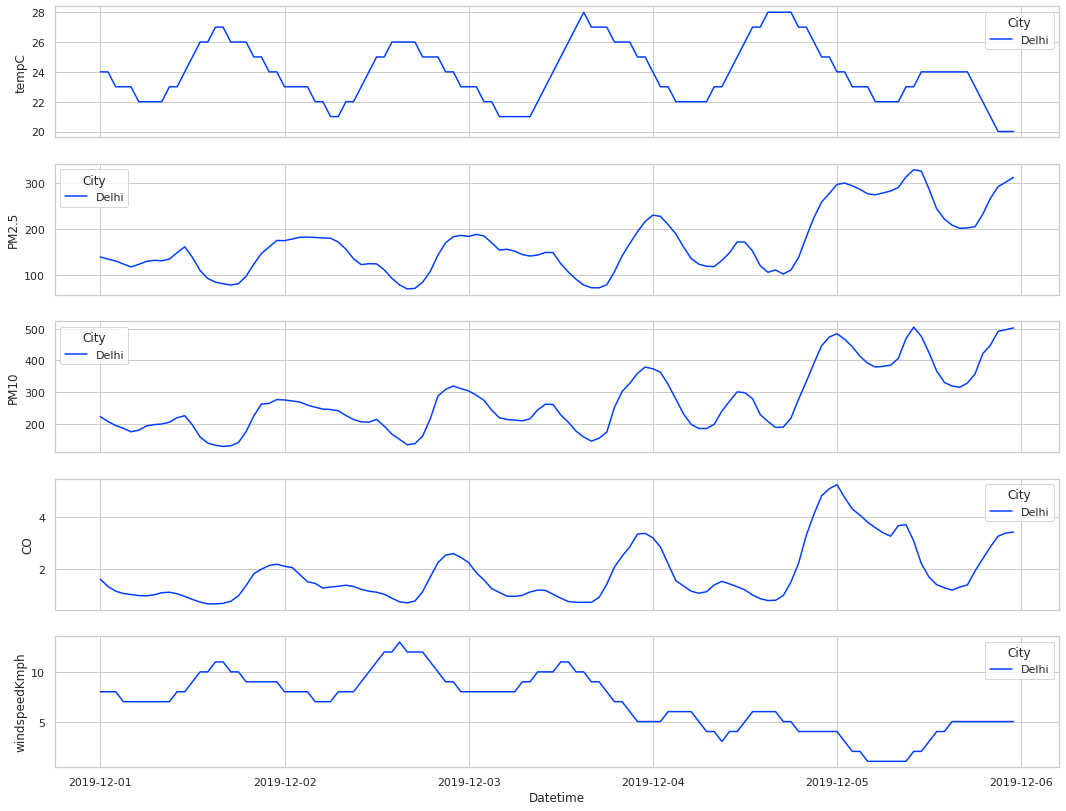

In [7]:
dc = df[(df.City == 'Delhi')]
dff = dc[(dc['Datetime'].dt.year == 2019) 
         & (dc['Datetime'].dt.month == 12) 
         & (dc['Datetime'].dt.day <=5)
        ]
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize = (18,14),sharex=True,)
sns.lineplot(dff['Datetime'],dff['tempC'],hue = dff['City'],ax=ax1)
sns.lineplot(dff['Datetime'],dff['PM2.5'],hue = dff['City'],ax=ax2)
sns.lineplot(dff['Datetime'],dff['PM10'],hue = dff['City'],ax=ax3)
sns.lineplot(dff['Datetime'],dff['CO'],hue = dff['City'],ax=ax4)
sns.lineplot(dff['Datetime'],dff['windspeedKmph'],hue = dff['City'],ax=ax5)
plt.show()

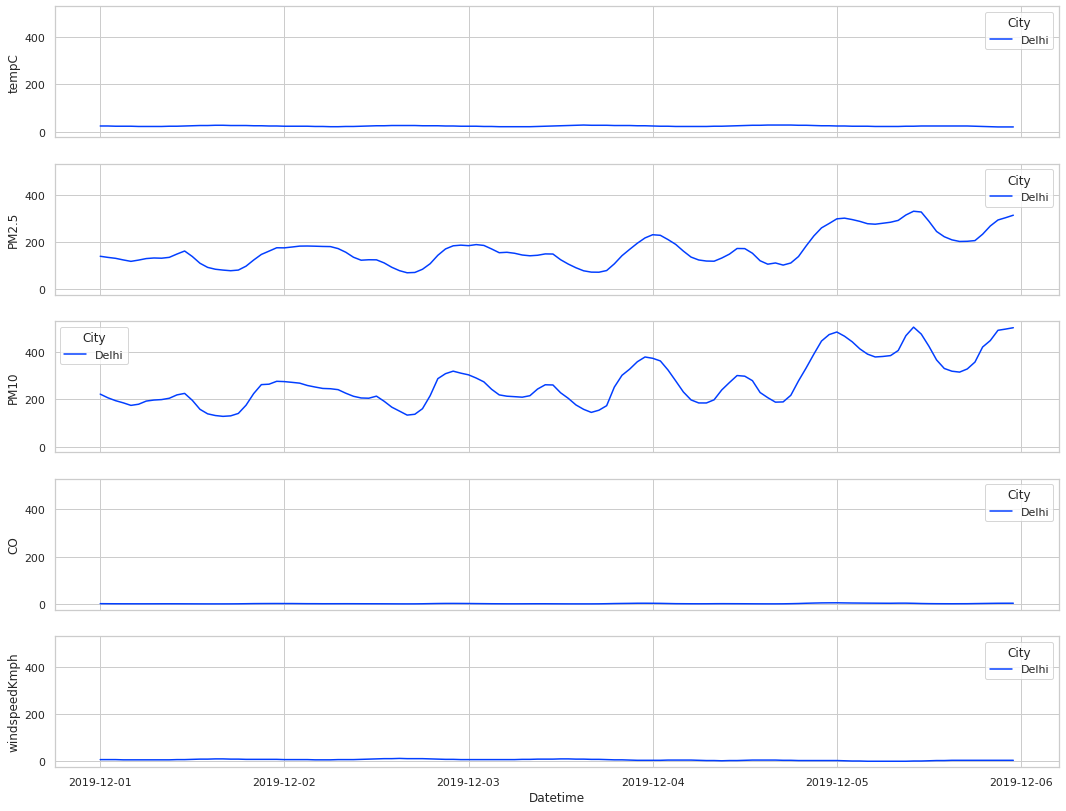

In [8]:
dc = df[(df.City == 'Delhi')]
dff = dc[(dc['Datetime'].dt.year == 2019) 
         & (dc['Datetime'].dt.month == 12) 
         & (dc['Datetime'].dt.day <=5)
        ]
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize = (18,14),sharex=True,sharey=True)
sns.lineplot(dff['Datetime'],dff['tempC'],hue = dff['City'],ax=ax1)
sns.lineplot(dff['Datetime'],dff['PM2.5'],hue = dff['City'],ax=ax2)
sns.lineplot(dff['Datetime'],dff['PM10'],hue = dff['City'],ax=ax3)
sns.lineplot(dff['Datetime'],dff['CO'],hue = dff['City'],ax=ax4)
sns.lineplot(dff['Datetime'],dff['windspeedKmph'],hue = dff['City'],ax=ax5)
plt.show()

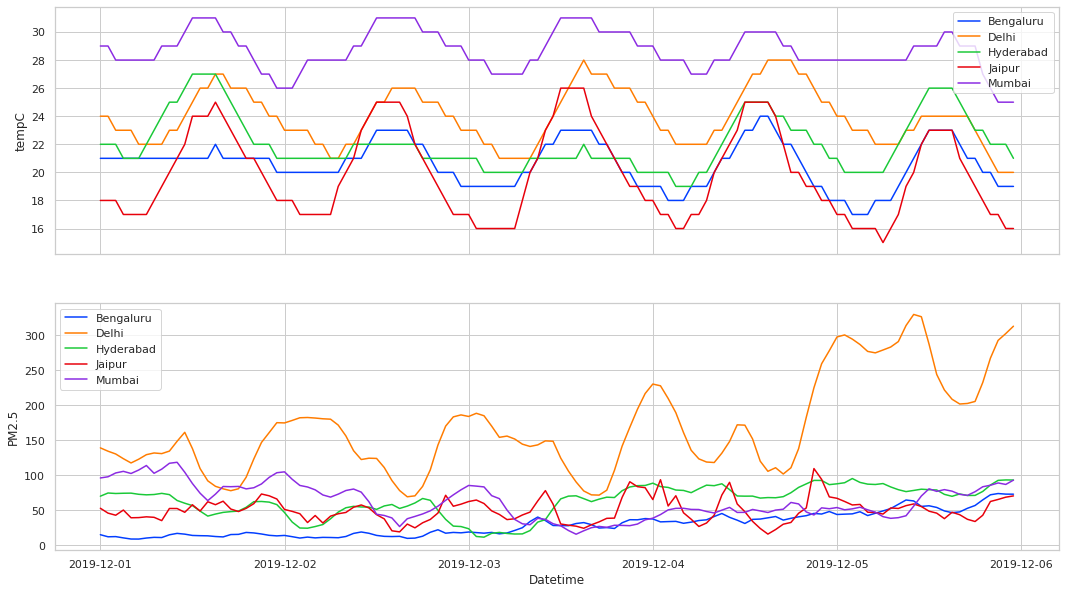

In [9]:
fig,ax = plt.subplots(2,1,figsize = (18,10),sharex=True)
for i in city:
    dc = df[df.City.isin([i])]
    dff = dc[(dc['Datetime'].dt.year == 2019) 
         & (dc['Datetime'].dt.month == 12) 
         & (dc['Datetime'].dt.day <=5)
        ]
    sns.lineplot(dff['Datetime'],dff['tempC'],label = i,ax=ax[0])
    sns.lineplot(dff['Datetime'],dff['PM2.5'],label = i,ax=ax[1])
plt.show()

In [13]:
N = df.shape[0]
sr = 1
dfc = df[df['City'].isin(['Mumbai'])]
dfc.head(2)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
153816,Mumbai,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,24.38,NaN,0.0,NaN,...,22,10,27,71,0.0,1009,21,10,34,6
153817,Mumbai,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,24.60,NaN,0.0,NaN,...,22,8,25,71,0.0,1009,21,10,33,5


In [14]:
y = np.array(dfc['tempC'])
y

array([21, 21, 20, ..., 25, 25, 24])

In [15]:
T = 1.0 / N
x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#plt.show()

In [16]:
f = fftpack.fftfreq(len(y))

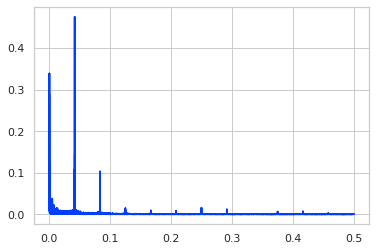

In [17]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli=freq_ampli.iloc[1:]
plt.plot(freq_ampli['Freq'],freq_ampli['Ampli'])

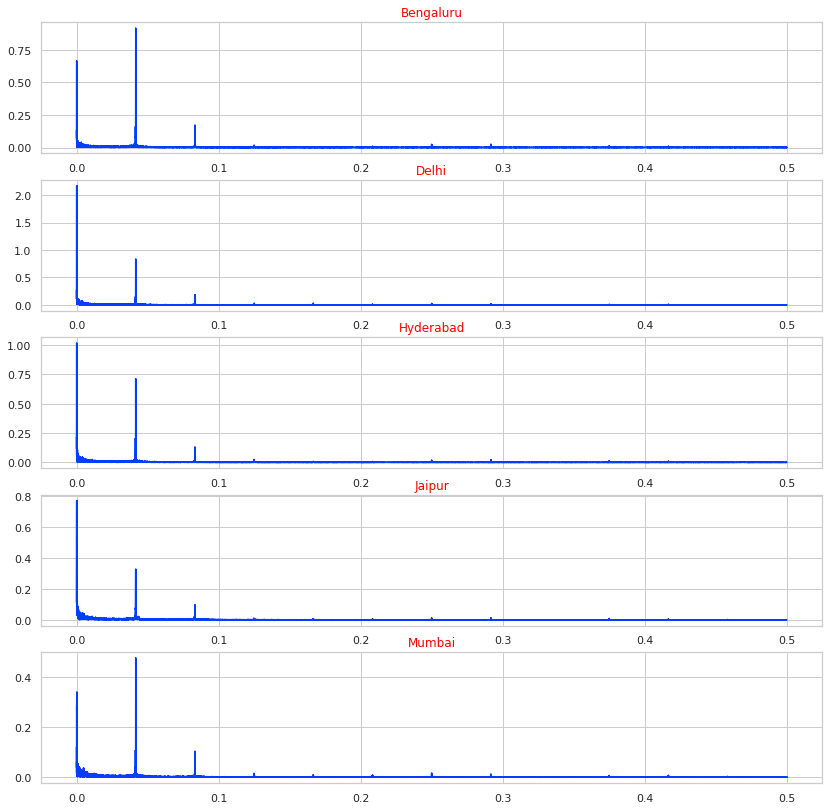

In [28]:
fig,ax = plt.subplots(5,1,figsize = (14,14))
for l,i in enumerate(city):
    N = df.shape[0]
    sr = 1
    dfc = df[df['City'].isin([i])]
    y = np.array(dfc['tempC'])
    T = 1.0 / N
    x = np.linspace(0.0, N*T, N)
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    f = fftpack.fftfreq(len(y))
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
    freq_ampli=freq_ampli.iloc[1:]
    ax[l].plot(freq_ampli['Freq'],freq_ampli['Ampli'])
    ax[l].set_title("{0}".format(i),c='red')

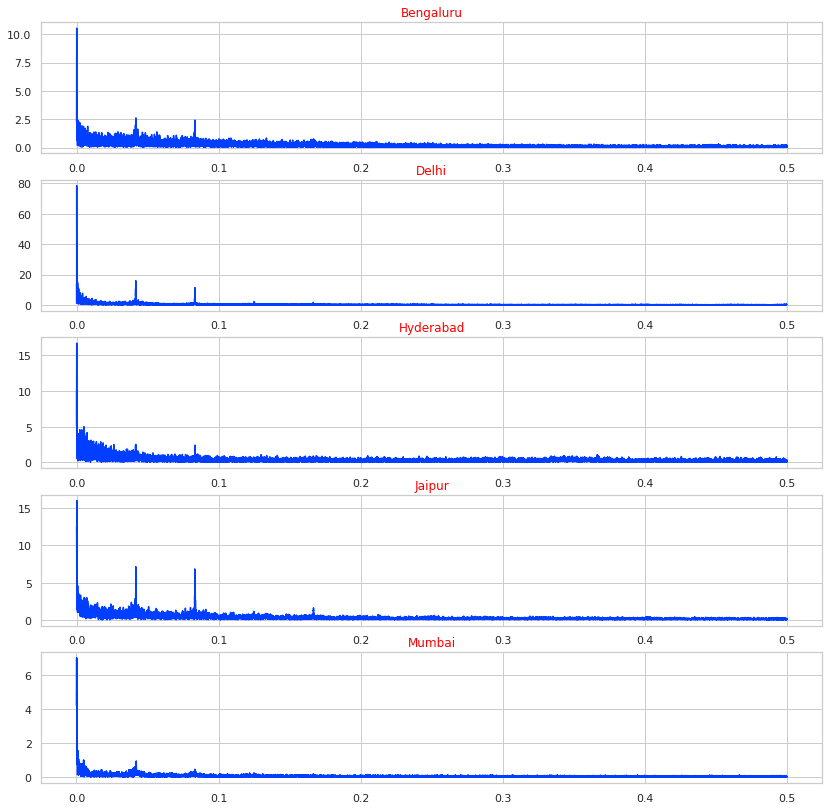

In [52]:
fig,ax = plt.subplots(5,1,figsize = (14,14))
for l,i in enumerate(city):
    sr = 1
    dfc = df[df['City'].isin([i])]
    y = np.array(dfc['PM2.5'])
    y = y[~np.isnan(y)]
    N = dfc.shape[0]
    T = 1.0 / N
    x = np.linspace(0.0, N*T, N)
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    f = fftpack.fftfreq(len(y))
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
    freq_ampli=freq_ampli.iloc[1:]
    ax[l].plot(freq_ampli['Freq'],freq_ampli['Ampli'])
    ax[l].set_title("{0}".format(i),c='red')

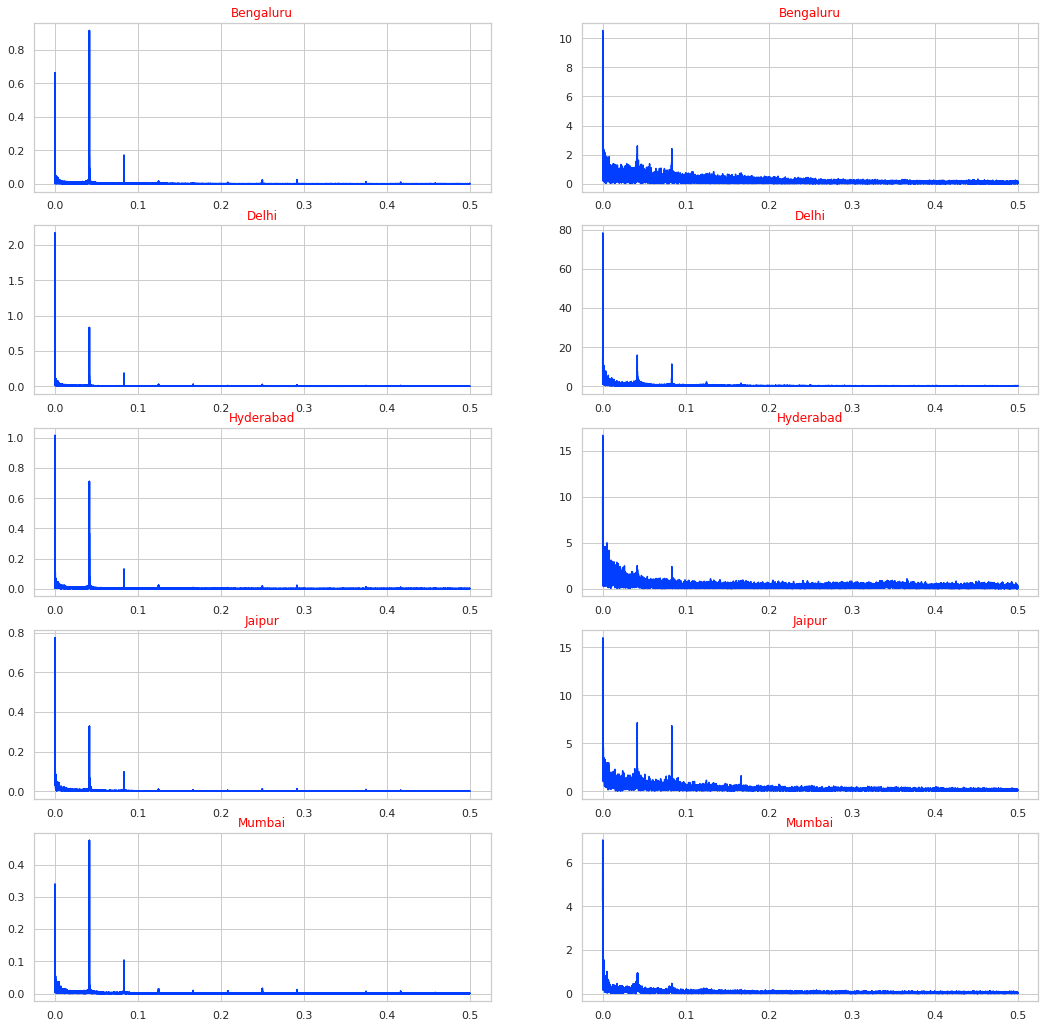

In [69]:
fig,ax = plt.subplots(5,2,figsize = (18,18))
for l,i in enumerate(city):
    N = df.shape[0]
    sr = 1
    dfc = df[df['City'].isin([i])]
    y = np.array(dfc['tempC'])
    T = 1.0 / N
    x = np.linspace(0.0, N*T, N)
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    f = fftpack.fftfreq(len(y))
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
    freq_ampli=freq_ampli.iloc[1:]
    ax[l][0].plot(freq_ampli['Freq'],freq_ampli['Ampli'])
    ax[l][0].set_title("{0}".format(i),c='red')
for l,i in enumerate(city):
    sr = 1
    dfc = df[df['City'].isin([i])]
    y = np.array(dfc['PM2.5'])
    y = y[~np.isnan(y)]
    N = dfc.shape[0]
    T = 1.0 / N
    x = np.linspace(0.0, N*T, N)
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    f = fftpack.fftfreq(len(y))
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
    freq_ampli=freq_ampli.iloc[1:]
    ax[l][1].plot(freq_ampli['Freq'],freq_ampli['Ampli'])
    ax[l][1].set_title("{0}".format(i),c='red')


In [63]:
N

43847

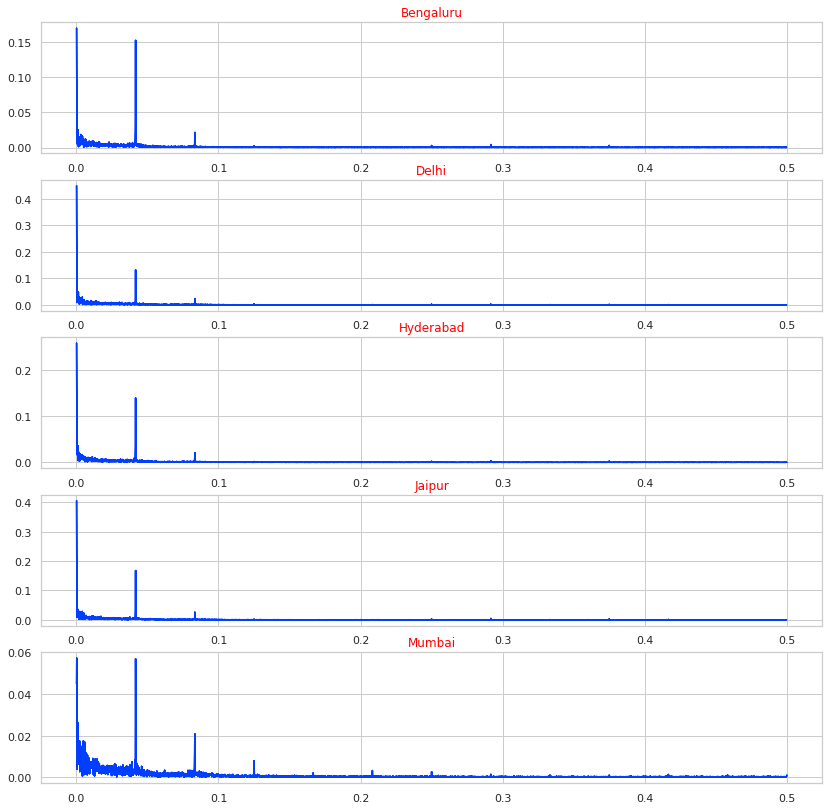

In [35]:
fig,ax = plt.subplots(5,1,figsize = (14,14))
for l,i in enumerate(city):
    N = df.shape[0]
    sr = 1
    dfc = df[df['City'].isin([i])]
    dfc = dfc[dfc['Datetime'].dt.year == 2019]
    y = np.array(dfc['tempC'])
    T = 1.0 / N
    x = np.linspace(0.0, N*T, N)
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    f = fftpack.fftfreq(len(y))
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
    freq_ampli=freq_ampli.iloc[1:]
    ax[l].plot(freq_ampli['Freq'],freq_ampli['Ampli'])
    ax[l].set_title("{0}".format(i),c='red')

In [50]:
N = df.shape[0]
sr = 1
y=np.array(df['PM2.5'])
y = y[~np.isnan(y)]
T = 1.0 / N
x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#plt.show()


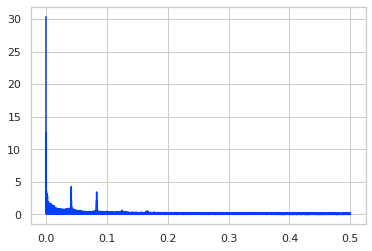

In [51]:
f = fftpack.fftfreq(len(y))
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli=freq_ampli.iloc[1:]
plt.plot(freq_ampli['Freq'],freq_ampli['Ampli'])

In [14]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

ModuleNotFoundError: No module named 'dtaidistance'

In [ ]:
s1 = np.asarray(dff['tempC'])
s2 = np.asarray(dff['PM10'])

In [ ]:
path = dtw.warping_path(s1, s2)
distance = dtw.distance(s1, s2)
print(distance)
dtwvis.plot_warping(s1, s2, path, 
                    #filename="warp.png"
                   )

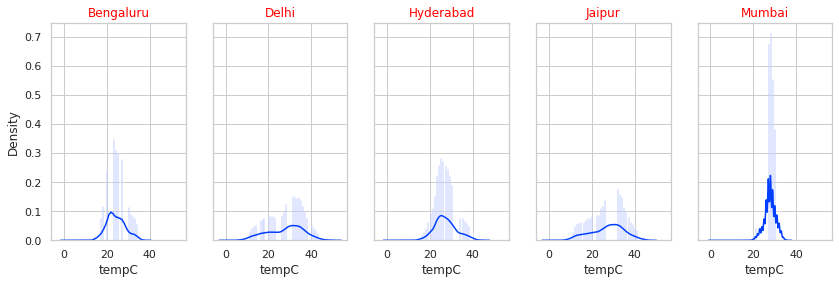

In [61]:
fig,ax = plt.subplots(1,5,figsize=(14,4),sharex=True,sharey=True)
j=0
for i in city:
    d = df[df.City.isin([i])]
    sns.distplot(d['tempC'],bins=150,ax = ax[j])
    ax[j].set_title(i,color='red')
    j=j+1    
plt.show()

<AxesSubplot:xlabel='Datetime', ylabel='tempC'>

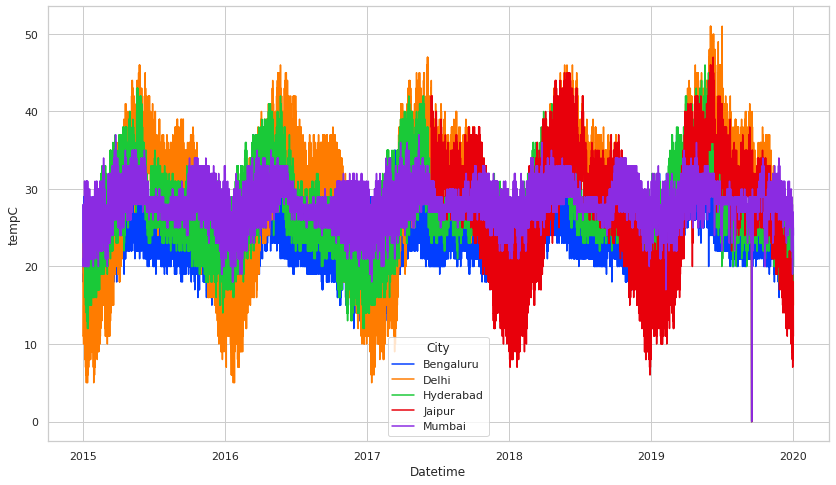

In [62]:
fig = plt.subplots(1,1,figsize=(14,8))
sns.lineplot(df.Datetime,df.tempC,hue=df.City)
